# Case Study: Predicting a person's income level

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult)

Data extracted from a 1994 census.

$50,000 in 1994 [are equivalent to approximately](https://www.aier.org/cost-of-living-calculator/?utm_source=Google%20Ads&utm_medium=Google%20CPC&utm_campaign=COLA&gclid=Cj0KCQjw0tKiBhC6ARIsAAOXutmugoX1IdNXAUsady2hgleQ7FkRxVVP5DtVPiaaO4MJz09meKuKOzsaAnCZEALw_wcB) $100,000 in 2023.

## Importing the required packages

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Add a Dartmouth-y color theme
import matplotlib as mpl
dartmouth_colors = ["#00693E", "#12312B", "#C3DD88", "#6EAA8D", "#797979", "#EBF3EF"]
mpl.rcParams.update({
                        'figure.facecolor': "#EBF3EF",
                        'figure.figsize': [7.50, 3.50],
                        'axes.prop_cycle': mpl.cycler(color=dartmouth_colors),
                        'axes.facecolor': "#FFFFFF",
                        'axes.labelcolor': '#12312B',
                        'text.color': '#12312B'
                    })

%config InlineBackend.figure_formats = ['svg']


## Loading the dataset

In [112]:
train_df = pd.read_csv('../data/adult.data', header=None)
test_df = pd.read_csv('../data/adult.test', header=None, skiprows=1)

names = ['age', 'workclass', 'fnlwgt', 
         'education', 'education_num', 'marital_status',
         'occupation', 'relationship', 'race', 'sex',
         'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
         'income_level']

for df in (train_df, test_df):
    df.columns = names
    df = df.drop(columns=['education_num', 'fnlwgt', 'capital_gain', 'capital_loss'])
    display(df.sample(5))

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_level
4593,47,Private,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
8353,26,Private,Bachelors,Never-married,Craft-repair,Not-in-family,White,Male,40,United-States,<=50K
25024,17,Private,11th,Never-married,Other-service,Not-in-family,White,Male,20,United-States,<=50K
18514,70,Private,7th-8th,Widowed,Other-service,Not-in-family,White,Female,35,United-States,<=50K
29589,21,Private,Some-college,Never-married,Sales,Own-child,White,Female,40,United-States,<=50K


,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_level
11371,26,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,40,United-States,>50K.
15223,17,Private,10th,Never-married,Other-service,Own-child,White,Female,10,United-States,<=50K.
10905,38,Private,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,45,United-States,<=50K.
2938,54,Private,9th,Divorced,Handlers-cleaners,Not-in-family,White,Male,24,United-States,<=50K.
1599,26,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States,<=50K.


## Encoding the categorical variables

In [115]:
for df in (train_df, test_df):
    df = pd.get_dummies(df, columns=['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
    df.education = df.education.str.strip()

In [117]:
from pandas.api.types import CategoricalDtype

education_levels = CategoricalDtype(
    categories=['Preschool',  '1st-4th', '5th-6th', '7th-8th', '9th', 
                '10th', '11th', '12th', 'HS-grad', 
                'Assoc-voc', 'Assoc-acdm', 
                'Some-college', 'Bachelors', 'Masters', 
                'Prof-school', 'Doctorate'],
    ordered=True
    )
for df in (train_df, test_df):
    df.education = df.education.astype(education_levels).cat.codes

In [118]:
features = [feature for feature in df.columns if feature != 'income_level']
target = 'income_level'

X_train = train_df
X_test = test_df


## Train the model

In [81]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

candidates = {
    'max_depth': [3, 5, 10],
}

dt = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid=candidates, n_jobs=5, verbose=3).fit(X_train[features], X_train[target])

print(dt.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .......................max_depth=3;, score=0.713 total time=   0.1s
[CV 2/5] END .......................max_depth=3;, score=0.709 total time=   0.1s
[CV 3/5] END .......................max_depth=3;, score=0.712 total time=   0.1s
[CV 4/5] END .......................max_depth=3;, score=0.708 total time=   0.1s
[CV 5/5] END .......................max_depth=3;, score=0.715 total time=   0.1s
[CV 2/5] END .......................max_depth=5;, score=0.773 total time=   0.1s
[CV 1/5] END .......................max_depth=5;, score=0.786 total time=   0.1s
[CV 3/5] END .......................max_depth=5;, score=0.783 total time=   0.1s
[CV 4/5] END .......................max_depth=5;, score=0.766 total time=   0.1s
[CV 5/5] END .......................max_depth=5;, score=0.791 total time=   0.1s
[CV 1/5] END ......................max_depth=10;, score=0.776 total time=   0.1s
[CV 2/5] END ......................max_depth=10;,

## Interpret the model

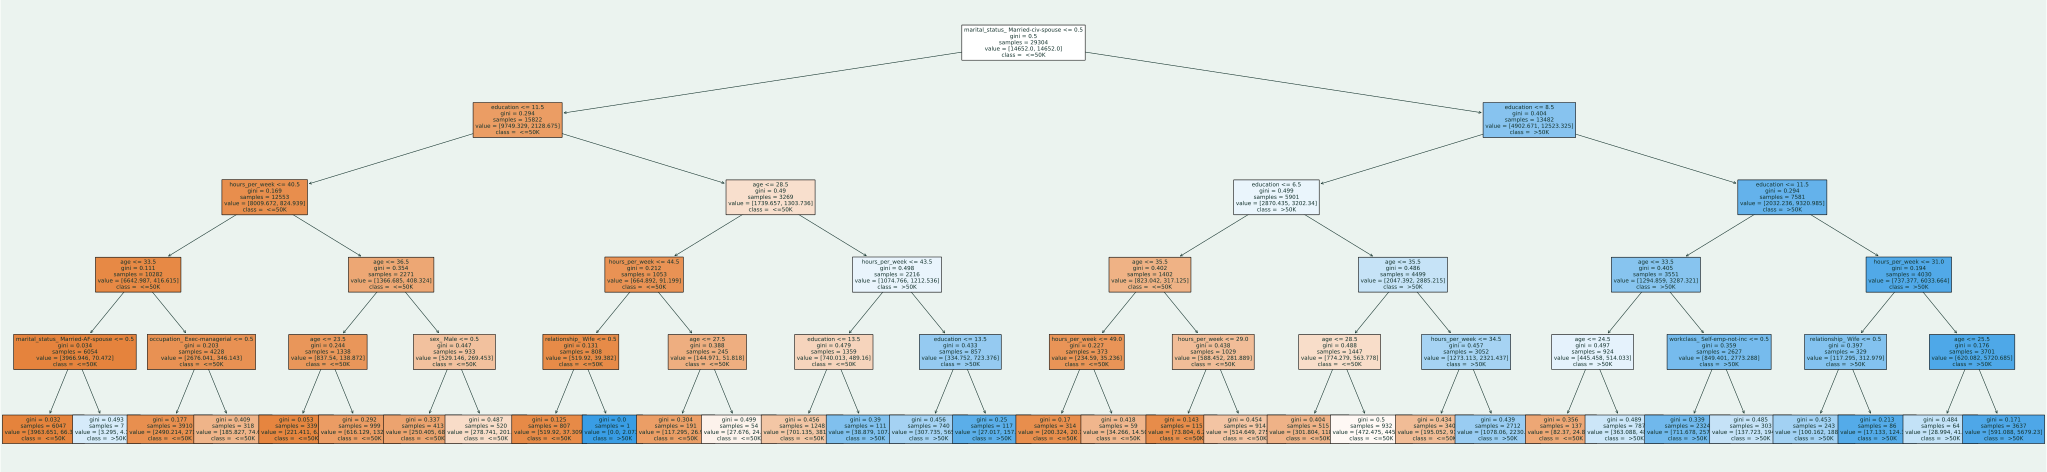

In [106]:
from sklearn.tree import plot_tree

plt.figure(figsize=(65, 15))
plot_tree(dt.best_estimator_, 
          feature_names=features, class_names=df[target].unique(), 
          filled=True, fontsize=10);

In [108]:
dt.best_estimator_.feature_importances_.max()

0.6245477996835344

## Evaluate the model's performance

In [94]:
print(classification_report(X_test[target], dt.predict(X_test[features])))

              precision    recall  f1-score   support

       <=50K       0.93      0.76      0.84      2485
        >50K       0.52      0.82      0.64       772

    accuracy                           0.78      3257
   macro avg       0.73      0.79      0.74      3257
weighted avg       0.83      0.78      0.79      3257

